In [ ]:
pip install featuretools==0.27.1

     |████████████████████████████████| 327 kB 9.3 MB/s 
     |████████████████████████████████| 11.3 MB 49.7 MB/s 
     |████████████████████████████████| 596 kB 55.9 MB/s 
     |████████████████████████████████| 802 kB 52.3 MB/s 
     |████████████████████████████████| 296 kB 62.1 MB/s 
     |████████████████████████████████| 132 kB 62.5 MB/s 
     |████████████████████████████████| 793 kB 62.4 MB/s 
     |████████████████████████████████| 793 kB 80.5 MB/s 
     |████████████████████████████████| 791 kB 83.4 MB/s 
     |████████████████████████████████| 786 kB 78.7 MB/s 
     |████████████████████████████████| 779 kB 64.9 MB/s 
     |████████████████████████████████| 778 kB 58.5 MB/s 
     |████████████████████████████████| 776 kB 62.9 MB/s 
     |████████████████████████████████| 769 kB 63.5 MB/s 
     |████████████████████████████████| 766 kB 77.1 MB/s 
     |████████████████████████████████| 1.0 MB 21.2 MB/s 
     |████████████████████████████████| 722 kB 59.0 MB/s 
     |████████

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import featuretools as ft
from featuretools.primitives import *
#from featuretools.variable_types import Numeric

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

In [ ]:
all_df = pd.read_csv('alldf.csv')

In [ ]:
!pip uninstall pandas
!pip install pandas

Found existing installation: pandas 1.1.5
Uninstalling pandas-1.1.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.1.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.1.5
  Using cached pandas-1.3.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [ ]:
import pandas as pd


In [ ]:
pd.__version__

'1.3.4'

In [ ]:
all_df = all_df.drop(['Unnamed: 0'],axis=1)

In [ ]:
all_df

,id_client,OKVED_CODE_fixed,WORKERSRANGE,OKTMO_CODE_fixed,new16,OKATO_REGIONCODE_y,new_F2200,TELEPHONECOUNT_fixed,new_F2300,new_F2400,OKFS_GROUP,OKATO_FED_y,F2410,new1,AGE,SIGNEDNUMBER_95_EVER,new15,new_F1520,new_F1150,new25,MANAGERCOUNTINCOUNTRY_fixed,new_F2110,new_F2210,F2340,new11,new_F2330,new2,F1210,F2200_LAG1,new_F1230,new_DATEFIRSTREG_year,new10,F2350,F1100,new_DATEFIRSTREG_month,new_SIGN_DATE_month,double,ind
0,1,43.11,6 .. 10,RARE_VALUE,0.041322,79.0,9.180000e+05,1.0,918000.0,918000.0,Частная собственность,40.0,NaN,NaN,NaN,152.517063,2.226551e+06,3.640310e+06,4.452124e+06,2.0,1.0,9.746644e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.162252e+07,NaN,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,43.116 .. 10,0
1,2,31.09,6 .. 10,RARE_VALUE,0.022727,79.0,1.168000e+06,2.0,1368000.0,1095000.0,Частная собственность,40.0,425000.0,16765.0,NaN,152.517063,3.181044e+06,3.640310e+06,4.452124e+06,2.0,1.0,9.746644e+07,NaN,NaN,NaN,-200000.0,0.000000,6.138092e+07,3.162252e+07,6213000.0,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,31.096 .. 10,1
2,3,10.11,0 .. 5,RARE_VALUE,0.000000,79.0,NaN,2.0,NaN,NaN,Частная собственность,40.0,NaN,NaN,NaN,152.517063,NaN,3.640310e+06,4.452124e+06,NaN,1.0,NaN,NaN,9.159715e+07,NaN,NaN,0.000000,6.138092e+07,NaN,-2225000.0,2009.899736,NaN,6.252513e+07,5.369539e+08,6.629207,6.350422,10.110 .. 5,2
3,5,10.51,251 .. 500,79701000001.0,0.001608,79.0,2.251528e+07,2.0,23302000.0,19022000.0,Частная собственность,40.0,5915000.0,156944.0,NaN,202.431122,1.948469e+05,3.640310e+06,9.112000e+06,3.0,1.0,9.746644e+07,6792000.0,9.159715e+07,0.863636,NaN,325353.171429,6.138092e+07,3.162252e+07,2017000.0,2009.534565,0.0,6.252513e+07,5.369539e+08,6.629207,6.350422,10.51251 .. 500,3
4,7,47.52.7,NaN,79701000001.0,NaN,79.0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,44.997624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513040.000000,NaN,NaN,NaN,2009.534565,NaN,NaN,NaN,6.457051,6.350422,47.52.7nan,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13678,12725,46.73,0 .. 5,45323000000.0,1.000000,45.0,NaN,1.0,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,152.517063,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,6.252513e+07,NaN,6.629207,6.508469,46.730 .. 5,13678
13679,12726,45.31,0 .. 5,45327000000.0,NaN,45.0,NaN,RARE_VALUE,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,NaN,NaN,6.457051,6.508469,45.310 .. 5,13679
13680,12728,41.20,0 .. 5,45329000000.0,NaN,45.0,NaN,0.0,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,NaN,NaN,6.629207,6.350422,41.200 .. 5,13680
13681,12729,46.46,101 .. 150,45321000000.0,NaN,45.0,NaN,RARE_VALUE,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,NaN,NaN,6.457051,6.508469,46.46101 .. 150,13681


In [ ]:
es = ft.EntitySet(id = 'MKB')
es = es.entity_from_dataframe(entity_id = 'df', dataframe = all_df,
                              index = 'ind')

In [ ]:
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 500
primitives[primitives['type'] == 'aggregation'].head(primitives[primitives['type'] == 'aggregation'].shape[0])

,name,type,dask_compatible,koalas_compatible,description,valid_inputs,return_type
0,last,aggregation,False,False,Determines the last value in a list.,Variable,None
1,std,aggregation,True,True,"Computes the dispersion relative to the mean value, ignoring `NaN`.",Numeric,Numeric
2,median,aggregation,False,False,Determines the middlemost number in a list of values.,Numeric,Numeric
3,avg_time_between,aggregation,False,False,Computes the average number of seconds between consecutive events.,DatetimeTimeIndex,Numeric
4,percent_true,aggregation,True,False,Determines the percent of `True` values.,Boolean,Numeric
5,num_unique,aggregation,True,True,"Determines the number of distinct values, ignoring `NaN` values.",Discrete,Numeric
6,min,aggregation,True,True,"Calculates the smallest value, ignoring `NaN` values.",Numeric,Numeric
7,trend,aggregation,False,False,Calculates the trend of a variable over time.,"Numeric, DatetimeTimeIndex",Numeric
8,mean,aggregation,True,True,Computes the average for a list of values.,Numeric,Numeric
9,time_since_last,aggregation,False,False,Calculates the time elapsed since the last datetime (default in seconds).,DatetimeTimeIndex,Numeric


In [ ]:
features, feature_names = ft.dfs(entityset = es, 
                                 target_entity = 'df', 
                                 max_depth = 2)
len(feature_names)

37

In [ ]:
es = ft.EntitySet(id = 'bank')

es.entity_from_dataframe(
    entity_id = 'data',
    dataframe = all_df,
    make_index = True,
    index = 'index'
)

Entityset: bank
  Entities:
    data [Rows: 13683, Columns: 37]
  Relationships:
    No relationships

In [ ]:
all_df = all_df.drop(['id_client','ind'],axis=1)

In [ ]:
#all_df = all_df

,index,id_client,OKVED_CODE_fixed,WORKERSRANGE,OKTMO_CODE_fixed,new16,OKATO_REGIONCODE_y,new_F2200,TELEPHONECOUNT_fixed,new_F2300,new_F2400,OKFS_GROUP,OKATO_FED_y,F2410,new1,AGE,SIGNEDNUMBER_95_EVER,new15,new_F1520,new_F1150,new25,MANAGERCOUNTINCOUNTRY_fixed,new_F2110,new_F2210,F2340,new11,new_F2330,new2,F1210,F2200_LAG1,new_F1230,new_DATEFIRSTREG_year,new10,F2350,F1100,new_DATEFIRSTREG_month,new_SIGN_DATE_month,double
0,0,1,43.11,6 .. 10,RARE_VALUE,0.041322,79.0,9.180000e+05,1.0,918000.0,918000.0,Частная собственность,40.0,NaN,NaN,NaN,152.517063,2.226551e+06,3.640310e+06,4.452124e+06,2.0,1.0,9.746644e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.162252e+07,NaN,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,43.116 .. 10
1,1,2,31.09,6 .. 10,RARE_VALUE,0.022727,79.0,1.168000e+06,2.0,1368000.0,1095000.0,Частная собственность,40.0,425000.0,16765.0,NaN,152.517063,3.181044e+06,3.640310e+06,4.452124e+06,2.0,1.0,9.746644e+07,NaN,NaN,NaN,-200000.0,0.000000,6.138092e+07,3.162252e+07,6213000.0,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,31.096 .. 10
2,2,3,10.11,0 .. 5,RARE_VALUE,0.000000,79.0,NaN,2.0,NaN,NaN,Частная собственность,40.0,NaN,NaN,NaN,152.517063,NaN,3.640310e+06,4.452124e+06,NaN,1.0,NaN,NaN,9.159715e+07,NaN,NaN,0.000000,6.138092e+07,NaN,-2225000.0,2009.899736,NaN,6.252513e+07,5.369539e+08,6.629207,6.350422,10.110 .. 5
3,3,5,10.51,251 .. 500,79701000001.0,0.001608,79.0,2.251528e+07,2.0,23302000.0,19022000.0,Частная собственность,40.0,5915000.0,156944.0,NaN,202.431122,1.948469e+05,3.640310e+06,9.112000e+06,3.0,1.0,9.746644e+07,6792000.0,9.159715e+07,0.863636,NaN,325353.171429,6.138092e+07,3.162252e+07,2017000.0,2009.534565,0.0,6.252513e+07,5.369539e+08,6.629207,6.350422,10.51251 .. 500
4,4,7,47.52.7,NaN,79701000001.0,NaN,79.0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,44.997624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513040.000000,NaN,NaN,NaN,2009.534565,NaN,NaN,NaN,6.457051,6.350422,47.52.7nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13678,13678,12725,46.73,0 .. 5,45323000000.0,1.000000,45.0,NaN,1.0,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,152.517063,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,6.252513e+07,NaN,6.629207,6.508469,46.730 .. 5
13679,13679,12726,45.31,0 .. 5,45327000000.0,NaN,45.0,NaN,RARE_VALUE,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,NaN,NaN,6.457051,6.508469,45.310 .. 5
13680,13680,12728,41.20,0 .. 5,45329000000.0,NaN,45.0,NaN,0.0,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,NaN,NaN,6.629207,6.350422,41.200 .. 5
13681,13681,12729,46.46,101 .. 150,45321000000.0,NaN,45.0,NaN,RARE_VALUE,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,NaN,NaN,6.457051,6.508469,46.46101 .. 150


In [ ]:
#all_df = all_df.drop(['ind'],axis=1)

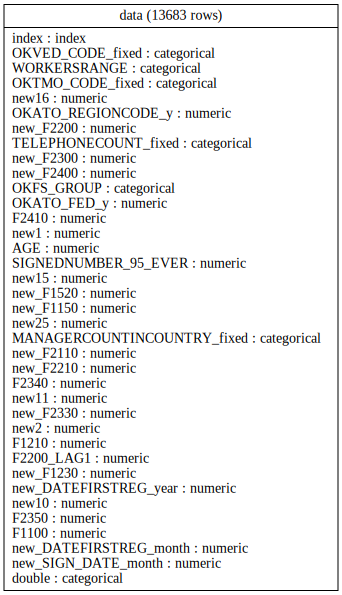

In [ ]:
es.plot()

In [ ]:
agg_f = """last	
std	
median	
avg_time_between	
percent_true	
num_unique	
min	
trend	
mean	
time_since_last	
any	
first	
all
skew
count
n_most_common
num_true
entropy
max	
mode
time_since_first
sum"""
agg_f = agg_f.split()

In [ ]:
feature_matrix, feature_defs = ft.dfs(
    entityset = es,
    target_entity = 'data',
    agg_primitives=agg_f,
    trans_primitives = [
        'add_numeric', 
        'multiply_numeric',
        'divide_numeric'
    ]
)

In [ ]:
all_df

,index,OKVED_CODE_fixed,WORKERSRANGE,OKTMO_CODE_fixed,new16,OKATO_REGIONCODE_y,new_F2200,TELEPHONECOUNT_fixed,new_F2300,new_F2400,OKFS_GROUP,OKATO_FED_y,F2410,new1,AGE,SIGNEDNUMBER_95_EVER,new15,new_F1520,new_F1150,new25,MANAGERCOUNTINCOUNTRY_fixed,new_F2110,new_F2210,F2340,new11,new_F2330,new2,F1210,F2200_LAG1,new_F1230,new_DATEFIRSTREG_year,new10,F2350,F1100,new_DATEFIRSTREG_month,new_SIGN_DATE_month,double
0,0,43.11,6 .. 10,RARE_VALUE,0.041322,79.0,9.180000e+05,1.0,918000.0,918000.0,Частная собственность,40.0,NaN,NaN,NaN,152.517063,2.226551e+06,3.640310e+06,4.452124e+06,2.0,1.0,9.746644e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.162252e+07,NaN,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,43.116 .. 10
1,1,31.09,6 .. 10,RARE_VALUE,0.022727,79.0,1.168000e+06,2.0,1368000.0,1095000.0,Частная собственность,40.0,425000.0,16765.0,NaN,152.517063,3.181044e+06,3.640310e+06,4.452124e+06,2.0,1.0,9.746644e+07,NaN,NaN,NaN,-200000.0,0.000000,6.138092e+07,3.162252e+07,6213000.0,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,31.096 .. 10
2,2,10.11,0 .. 5,RARE_VALUE,0.000000,79.0,NaN,2.0,NaN,NaN,Частная собственность,40.0,NaN,NaN,NaN,152.517063,NaN,3.640310e+06,4.452124e+06,NaN,1.0,NaN,NaN,9.159715e+07,NaN,NaN,0.000000,6.138092e+07,NaN,-2225000.0,2009.899736,NaN,6.252513e+07,5.369539e+08,6.629207,6.350422,10.110 .. 5
3,3,10.51,251 .. 500,79701000001.0,0.001608,79.0,2.251528e+07,2.0,23302000.0,19022000.0,Частная собственность,40.0,5915000.0,156944.0,NaN,202.431122,1.948469e+05,3.640310e+06,9.112000e+06,3.0,1.0,9.746644e+07,6792000.0,9.159715e+07,0.863636,NaN,325353.171429,6.138092e+07,3.162252e+07,2017000.0,2009.534565,0.0,6.252513e+07,5.369539e+08,6.629207,6.350422,10.51251 .. 500
4,4,47.52.7,NaN,79701000001.0,NaN,79.0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,44.997624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513040.000000,NaN,NaN,NaN,2009.534565,NaN,NaN,NaN,6.457051,6.350422,47.52.7nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13678,13678,46.73,0 .. 5,45323000000.0,1.000000,45.0,NaN,1.0,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,152.517063,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,6.252513e+07,NaN,6.629207,6.508469,46.730 .. 5
13679,13679,45.31,0 .. 5,45327000000.0,NaN,45.0,NaN,RARE_VALUE,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,NaN,NaN,6.457051,6.508469,45.310 .. 5
13680,13680,41.20,0 .. 5,45329000000.0,NaN,45.0,NaN,0.0,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,NaN,NaN,6.629207,6.350422,41.200 .. 5
13681,13681,46.46,101 .. 150,45321000000.0,NaN,45.0,NaN,RARE_VALUE,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,NaN,NaN,6.457051,6.508469,46.46101 .. 150


In [ ]:
feature_matrix

,OKVED_CODE_fixed,WORKERSRANGE,OKTMO_CODE_fixed,new16,OKATO_REGIONCODE_y,new_F2200,TELEPHONECOUNT_fixed,new_F2300,new_F2400,OKFS_GROUP,OKATO_FED_y,F2410,new1,AGE,SIGNEDNUMBER_95_EVER,new15,new_F1520,new_F1150,new25,MANAGERCOUNTINCOUNTRY_fixed,new_F2110,new_F2210,F2340,new11,new_F2330,new2,F1210,F2200_LAG1,new_F1230,new_DATEFIRSTREG_year,new10,F2350,F1100,new_DATEFIRSTREG_month,new_SIGN_DATE_month,double,AGE + F1100,AGE + F1210,AGE + F2200_LAG1,AGE + F2340,...,new_F2110 * SIGNEDNUMBER_95_EVER,new_F2110 * new_F2200,new_F2110 * new_F2210,new_F2110 * new_F2300,new_F2110 * new_F2330,new_F2110 * new_F2400,new_F2110 * new_SIGN_DATE_month,new_F2200 * OKATO_FED_y,new_F2200 * OKATO_REGIONCODE_y,new_F2200 * SIGNEDNUMBER_95_EVER,new_F2200 * new_F2210,new_F2200 * new_F2300,new_F2200 * new_F2330,new_F2200 * new_F2400,new_F2200 * new_SIGN_DATE_month,new_F2210 * OKATO_FED_y,new_F2210 * OKATO_REGIONCODE_y,new_F2210 * SIGNEDNUMBER_95_EVER,new_F2210 * new_F2300,new_F2210 * new_F2330,new_F2210 * new_F2400,new_F2210 * new_SIGN_DATE_month,new_F2300 * OKATO_FED_y,new_F2300 * OKATO_REGIONCODE_y,new_F2300 * SIGNEDNUMBER_95_EVER,new_F2300 * new_F2330,new_F2300 * new_F2400,new_F2300 * new_SIGN_DATE_month,new_F2330 * OKATO_FED_y,new_F2330 * OKATO_REGIONCODE_y,new_F2330 * SIGNEDNUMBER_95_EVER,new_F2330 * new_F2400,new_F2330 * new_SIGN_DATE_month,new_F2400 * OKATO_FED_y,new_F2400 * OKATO_REGIONCODE_y,new_F2400 * SIGNEDNUMBER_95_EVER,new_F2400 * new_SIGN_DATE_month,new_SIGN_DATE_month * OKATO_FED_y,new_SIGN_DATE_month * OKATO_REGIONCODE_y,new_SIGN_DATE_month * SIGNEDNUMBER_95_EVER
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,43.11,6 .. 10,RARE_VALUE,0.041322,79.0,9.180000e+05,1.0,918000.0,918000.0,Частная собственность,40.0,NaN,NaN,NaN,152.517063,2.226551e+06,3.640310e+06,4.452124e+06,2.0,1.0,9.746644e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.162252e+07,NaN,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,43.116 .. 10,NaN,NaN,NaN,NaN,...,1.486530e+10,8.947420e+13,NaN,8.947420e+13,NaN,8.947420e+13,6.189531e+08,3.672000e+07,7.252200e+07,1.400107e+08,NaN,8.427240e+11,NaN,8.427240e+11,5.829688e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36720000.0,7.252200e+07,1.400107e+08,NaN,8.427240e+11,5.829688e+06,NaN,NaN,NaN,NaN,NaN,36720000.0,7.252200e+07,1.400107e+08,5.829688e+06,254.016899,501.683376,968.547787
1,31.09,6 .. 10,RARE_VALUE,0.022727,79.0,1.168000e+06,2.0,1368000.0,1095000.0,Частная собственность,40.0,425000.0,16765.0,NaN,152.517063,3.181044e+06,3.640310e+06,4.452124e+06,2.0,1.0,9.746644e+07,NaN,NaN,NaN,-200000.0,0.000000,6.138092e+07,3.162252e+07,6213000.0,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,31.096 .. 10,NaN,NaN,NaN,NaN,...,1.486530e+10,1.138408e+14,NaN,1.333341e+14,-1.949329e+13,1.067258e+14,6.189531e+08,4.672000e+07,9.227200e+07,1.781399e+08,NaN,1.597824e+12,-2.336000e+11,1.278960e+12,7.417293e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54720000.0,1.080720e+08,2.086433e+08,-2.736000e+11,1.497960e+12,8.687378e+06,-8000000.0,-15800000.0,-3.050341e+07,-2.190000e+11,-1.270084e+06,43800000.0,8.650500e+07,1.670062e+08,6.953713e+06,254.016899,501.683376,968.547787
2,10.11,0 .. 5,RARE_VALUE,0.000000,79.0,NaN,2.0,NaN,NaN,Частная собственность,40.0,NaN,NaN,NaN,152.517063,NaN,3.640310e+06,4.452124e+06,NaN,1.0,NaN,NaN,9.159715e+07,NaN,NaN,0.000000,6.138092e+07,NaN,-2225000.0,2009.899736,NaN,6.252513e+07,5.369539e+08,6.629207,6.350422,10.110 .. 5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.016899,501.683376,968.547787
3,10.51,251 .. 500,79701000001.0,0.001608,79.0,2.251528e+07,2.0,23302000.0,19022000.0,Частная собственность,40.0,5915000.0,156944.0,NaN,202.431122,1.948469e+05,3.640310e+06,9.112000e+06,3.0,1.0,9.746644e+07,6792000.0,9.159715e+07,0.863636,NaN,325353.171429,6.138092e+07,3.162252e+07,2017000.0,2009.534565,0.0,6.252513e+07,5.369539e+08,6.629207,6.350422,10.51251 .. 500,NaN,NaN,NaN,NaN,...,1.973024e+10,2.1

In [ ]:
konh = pd.read_csv('konh.csv')

In [ ]:
labels_tune = konh['TARGET']

In [ ]:
import random
def n05(x):
    if x>0.5:
        return 1
    if x==0.5:
        return random.choice([0, 1])
    return 0

In [ ]:
list(labels_tune.apply(n05).array)

In [ ]:
konh

,Unnamed: 0,id_client,id_contract,IP_flag,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,...,new4,new5,new6,new7,new8,new9,new10,new11,new12,new13,new14,new15,new16,new17,new18,new19,new20,new21,new22,new23,new24,new25,new26,new27,new28,new_F1150,new_F1230,new_F1410,new_F1510,new_F1520,new_F2110,new_F2120,new_F2200,new_F2210,new_F2220,new_F2300,new_F2320,new_F2330,new_F2400,TARGET
0,0,1,5166.0,0.0,10000.0,NaN,10000.0,NaN,NaN,NaN,NaN,7035000.0,NaN,NaN,NaN,NaN,7035000.0,NaN,6121000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,924000.0,NaN,924000.0,NaN,NaN,7045000.0,7045000.0,NaN,32078000.0,27921000.0,4157000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125000,0.550000,2.226551e+06,0.041322,0.458678,1.159381e+06,NaN,NaN,NaN,NaN,NaN,6.050000,2.00,5.045455,9.000000,4.686366,0.0,NaN,NaN,NaN,38000.0,5472000.0,4554000.0,918000.0,NaN,NaN,918000.0,NaN,NaN,918000.0,1.0
1,1,2,2389.0,0.0,14626000.0,NaN,14414000.0,NaN,212000.0,NaN,NaN,14939000.0,8521000.0,NaN,6395000.0,NaN,23000.0,NaN,18901000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10664000.0,8995000.0,1669000.0,NaN,NaN,29565000.0,29565000.0,NaN,28874000.0,26330000.0,2544000.0,NaN,...,NaN,1.0,inf,NaN,NaN,NaN,NaN,NaN,NaN,0.047619,0.619048,3.181044e+06,0.022727,0.465909,4.343591e+06,NaN,NaN,NaN,NaN,NaN,4.190476,2.00,3.153846,3.153846,4.306454,-1180000.0,6213000.0,NaN,8525000.0,19000.0,17403000.0,16235000.0,1168000.0,NaN,NaN,1368000.0,NaN,-200000.0,1095000.0,0.0
2,2,3,17329.0,0.0,3745000.0,NaN,3745000.0,NaN,NaN,NaN,NaN,9131000.0,888000.0,67000.0,6261000.0,NaN,645000.0,1270000.0,40000.0,40000.0,NaN,NaN,NaN,NaN,10113000.0,10113000.0,NaN,NaN,2723000.0,NaN,2723000.0,NaN,NaN,12876000.0,12876000.0,120000.0,378000.0,258000.0,73000.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1005000.0,-2225000.0,-2391000.0,NaN,2440000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3,5,15086.0,0.0,87239000.0,NaN,86087000.0,NaN,NaN,262000.0,890000.0,75181000.0,23412000.0,NaN,29428000.0,10200000.0,12141000.0,NaN,134209000.0,10518000.0,NaN,NaN,NaN,104475000.0,NaN,NaN,NaN,NaN,28211000.0,NaN,28111000.0,NaN,100000.0,162420000.0,162420000.0,104340000.0,871384000.0,767044000.0,40236000.0,64104000.0,...,2.0,6.0,10.0,0.0,1.000000,3.383690e+05,0.000000,0.863636,2.336221e+05,0.003247,0.938312,1.948469e+05,0.001608,0.919614,2.401059e+05,22.000000,NaN,19.0,17.000000,11.737408,6.058442,3.00,5.937716,5.023102,6.189865,9112000.0,2017000.0,NaN,NaN,-1121000.0,23631000.0,-7613000.0,24452000.0,6792000.0,NaN,23302000.0,256000.0,NaN,19022000.0,0.0
4,4,7,933.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,inf,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8917,8917,12731,10258.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.555556,9.865797e+05,0.050000,0.650000,9.207681e+05,0.011628,0.610465,1.342066e+05,0.013193,0.620053,1.631243e+05,2.222222,inf,2.6,1.333333,1.244391,1.101744,1.25,1.119048,1.126316,1.369004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8918,8918,12732,10005.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.

In [ ]:
feature_matrix = feature_matrix.reset_index()

In [ ]:
feature_matrix = feature_matrix.drop(['index'],axis=1)

In [ ]:
train_df = feature_matrix.iloc[:8922]
test_df = feature_matrix.iloc[8922:]

In [ ]:
train_df['TARGET'] = list(labels_tune.apply(n05).array)

In [ ]:
!pip install lightautoml

     |████████████████████████████████| 293 kB 8.3 MB/s 
     |████████████████████████████████| 308 kB 62.5 MB/s 
     |████████████████████████████████| 1.2 MB 71.4 MB/s 
     |████████████████████████████████| 76.3 MB 61 kB/s 
     |████████████████████████████████| 424 kB 64.0 MB/s 
     |████████████████████████████████| 15.7 MB 19.7 MB/s 
     |████████████████████████████████| 804.1 MB 2.5 kB/s 
     |████████████████████████████████| 204 kB 63.0 MB/s 
     |████████████████████████████████| 2.8 MB 73.1 MB/s 
     |████████████████████████████████| 209 kB 76.0 MB/s 
     |████████████████████████████████| 80 kB 11.2 MB/s 
     |████████████████████████████████| 75 kB 5.0 MB/s 
     |████████████████████████████████| 49 kB 7.4 MB/s 
     |████████████████████████████████| 112 kB 63.0 MB/s 
     |████████████████████████████████| 149 kB 47.5 MB/s 
     |████████████████████████████████| 23.3 MB 8.7 MB/s 
     |████████████████████████████████| 22.1 MB 1.4 MB/s 
     |█████████████

In [ ]:
!pip install dataclasses
!pip install importlib_metadata
!pip install numpy

In [ ]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
# Standard python libraries
import logging
import os
import time
import requests
logging.basicConfig(format='[%(asctime)s] (%(levelname)s): %(message)s', level=logging.INFO)
import lightautoml

# Installed libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import torch

# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

import multiprocessing as mp

# set option of max 100 displayed rows
pd.set_option('display.max_rows', 200)

In [ ]:
N_THREADS = mp.cpu_count() # threads cnt for lgbm and linear models
N_FOLDS = 10 # folds cnt for AutoML - 10 is better
RANDOM_STATE = 42 # fixed random state for various reasons
TIMEOUT = 3600 # Time in seconds for automl run
TARGET_NAME = 'TARGET' # Target column name

In [ ]:
%%time

roles = {'target': TARGET_NAME,
         
         }

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs


In [ ]:
train_df

,OKVED_CODE_fixed,WORKERSRANGE,OKTMO_CODE_fixed,new16,OKATO_REGIONCODE_y,new_F2200,TELEPHONECOUNT_fixed,new_F2300,new_F2400,OKFS_GROUP,OKATO_FED_y,F2410,new1,AGE,SIGNEDNUMBER_95_EVER,new15,new_F1520,new_F1150,new25,MANAGERCOUNTINCOUNTRY_fixed,new_F2110,new_F2210,F2340,new11,new_F2330,new2,F1210,F2200_LAG1,new_F1230,new_DATEFIRSTREG_year,new10,F2350,F1100,new_DATEFIRSTREG_month,new_SIGN_DATE_month,double,AGE + F1100,AGE + F1210,AGE + F2200_LAG1,AGE + F2340,...,new_F2110 * new_F2200,new_F2110 * new_F2210,new_F2110 * new_F2300,new_F2110 * new_F2330,new_F2110 * new_F2400,new_F2110 * new_SIGN_DATE_month,new_F2200 * OKATO_FED_y,new_F2200 * OKATO_REGIONCODE_y,new_F2200 * SIGNEDNUMBER_95_EVER,new_F2200 * new_F2210,new_F2200 * new_F2300,new_F2200 * new_F2330,new_F2200 * new_F2400,new_F2200 * new_SIGN_DATE_month,new_F2210 * OKATO_FED_y,new_F2210 * OKATO_REGIONCODE_y,new_F2210 * SIGNEDNUMBER_95_EVER,new_F2210 * new_F2300,new_F2210 * new_F2330,new_F2210 * new_F2400,new_F2210 * new_SIGN_DATE_month,new_F2300 * OKATO_FED_y,new_F2300 * OKATO_REGIONCODE_y,new_F2300 * SIGNEDNUMBER_95_EVER,new_F2300 * new_F2330,new_F2300 * new_F2400,new_F2300 * new_SIGN_DATE_month,new_F2330 * OKATO_FED_y,new_F2330 * OKATO_REGIONCODE_y,new_F2330 * SIGNEDNUMBER_95_EVER,new_F2330 * new_F2400,new_F2330 * new_SIGN_DATE_month,new_F2400 * OKATO_FED_y,new_F2400 * OKATO_REGIONCODE_y,new_F2400 * SIGNEDNUMBER_95_EVER,new_F2400 * new_SIGN_DATE_month,new_SIGN_DATE_month * OKATO_FED_y,new_SIGN_DATE_month * OKATO_REGIONCODE_y,new_SIGN_DATE_month * SIGNEDNUMBER_95_EVER,TARGET
0,43.11,6 .. 10,RARE_VALUE,0.041322,79.0,9.180000e+05,1.0,918000.0,918000.0,Частная собственность,40.0,NaN,NaN,NaN,152.517063,2.226551e+06,3.640310e+06,4.452124e+06,2.00,1.0,9.746644e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.162252e+07,NaN,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,43.116 .. 10,NaN,NaN,NaN,NaN,...,8.947420e+13,NaN,8.947420e+13,NaN,8.947420e+13,6.189531e+08,3.672000e+07,7.252200e+07,1.400107e+08,NaN,8.427240e+11,NaN,8.427240e+11,5.829688e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36720000.0,7.252200e+07,1.400107e+08,NaN,8.427240e+11,5.829688e+06,NaN,NaN,NaN,NaN,NaN,36720000.0,7.252200e+07,1.400107e+08,5.829688e+06,254.016899,501.683376,968.547787,1
1,31.09,6 .. 10,RARE_VALUE,0.022727,79.0,1.168000e+06,2.0,1368000.0,1095000.0,Частная собственность,40.0,425000.0,16765.0,NaN,152.517063,3.181044e+06,3.640310e+06,4.452124e+06,2.00,1.0,9.746644e+07,NaN,NaN,NaN,-200000.0,0.000000e+00,6.138092e+07,3.162252e+07,6213000.0,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,31.096 .. 10,NaN,NaN,NaN,NaN,...,1.138408e+14,NaN,1.333341e+14,-1.949329e+13,1.067258e+14,6.189531e+08,4.672000e+07,9.227200e+07,1.781399e+08,NaN,1.597824e+12,-2.336000e+11,1.278960e+12,7.417293e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54720000.0,1.080720e+08,2.086433e+08,-2.736000e+11,1.497960e+12,8.687378e+06,-8000000.0,-15800000.0,-3.050341e+07,-2.190000e+11,-1.270084e+06,43800000.0,8.650500e+07,1.670062e+08,6.953713e+06,254.016899,501.683376,968.547787,0
2,10.11,0 .. 5,RARE_VALUE,0.000000,79.0,NaN,2.0,NaN,NaN,Частная собственность,40.0,NaN,NaN,NaN,152.517063,NaN,3.640310e+06,4.452124e+06,NaN,1.0,NaN,NaN,9.159715e+07,NaN,NaN,0.000000e+00,6.138092e+07,NaN,-2225000.0,2009.899736,NaN,6.252513e+07,5.369539e+08,6.629207,6.350422,10.110 .. 5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.016899,501.683376,968.547787,1
3,10.51,251 .. 500,79701000001.0,0.001608,79.0,2.251528e+07,2.0,23302000.0,19022000.0,Частная собственность,40.0,5915000.0,156944.0,NaN,202.431122,1.948469e+05,3.640310e+06,9.112000e+06,3.00,1.0,9.746644e+07,6792000.0,9.159715e+07,0.863636,NaN,3.253532e+05,6.138092e+07,3.162252e+07,2017000.0,2009.534565,0.000000,6.252513e+07,5.369539e+08,6.629207,6.350422,10.51251 .. 500,NaN,NaN,NaN,NaN,...,2.194485e+15,6.619921e+14,2.271163e+15,NaN,1.854007e+15,6.189531e+08,9.006114e+08,1.778707e+09,4.557794e+09,1.529238e+14,5.246512e+14,NaN,

In [ ]:
%%time

task = Task('binary', loss='logloss', metric='auc')

CPU times: user 3.81 ms, sys: 993 µs, total: 4.8 ms
Wall time: 8.76 ms


In [ ]:
#### %%time 
automl = TabularAutoML(task = task, 
                       timeout = 4800,
                       cpu_limit = N_THREADS,
                       #general_params = {'use_algos': [['linear_l2', 'lgb', 'lgb_tuned']]},
                       reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                      )
oof_pred = automl.fit_predict(train_df, roles = roles)
logging.info('oof_pred:\n{}\nShape = {}'.format(oof_pred, oof_pred.shape))

Выходные данные были обрезаны до нескольких последних строк (5000).
[2021-11-24 22:27:23,487] (DEBUG): 372:	test: 0.8156167	best: 0.8162362 (359)	total: 35.9s	remaining: 4m 12s
[2021-11-24 22:27:23,583] (DEBUG): 373:	test: 0.8157602	best: 0.8162362 (359)	total: 36s	remaining: 4m 12s
[2021-11-24 22:27:23,684] (DEBUG): 374:	test: 0.8156696	best: 0.8162362 (359)	total: 36.1s	remaining: 4m 12s
[2021-11-24 22:27:23,774] (DEBUG): 375:	test: 0.8156922	best: 0.8162362 (359)	total: 36.2s	remaining: 4m 12s
[2021-11-24 22:27:23,868] (DEBUG): 376:	test: 0.8157829	best: 0.8162362 (359)	total: 36.3s	remaining: 4m 12s
[2021-11-24 22:27:23,961] (DEBUG): 377:	test: 0.8157074	best: 0.8162362 (359)	total: 36.4s	remaining: 4m 12s
[2021-11-24 22:27:24,060] (DEBUG): 378:	test: 0.8157149	best: 0.8162362 (359)	total: 36.5s	remaining: 4m 12s
[2021-11-24 22:27:24,162] (DEBUG): 379:	test: 0.8156394	best: 0.8162362 (359)	total: 36.6s	remaining: 4m 12s
[2021-11-24 22:27:24,255] (DEBUG): 380:	test: 0.8156318	best: 

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_df['TARGET'],oof_pred.data)

0.8252439270538351

In [ ]:
train_df

,OKVED_CODE_fixed,WORKERSRANGE,OKTMO_CODE_fixed,new16,OKATO_REGIONCODE_y,new_F2200,TELEPHONECOUNT_fixed,new_F2300,new_F2400,OKFS_GROUP,OKATO_FED_y,F2410,new1,AGE,SIGNEDNUMBER_95_EVER,new15,new_F1520,new_F1150,new25,MANAGERCOUNTINCOUNTRY_fixed,new_F2110,new_F2210,F2340,new11,new_F2330,new2,F1210,F2200_LAG1,new_F1230,new_DATEFIRSTREG_year,new10,F2350,F1100,new_DATEFIRSTREG_month,new_SIGN_DATE_month,double,AGE + F1100,AGE + F1210,AGE + F2200_LAG1,AGE + F2340,...,new_F2110 * new_F2200,new_F2110 * new_F2210,new_F2110 * new_F2300,new_F2110 * new_F2330,new_F2110 * new_F2400,new_F2110 * new_SIGN_DATE_month,new_F2200 * OKATO_FED_y,new_F2200 * OKATO_REGIONCODE_y,new_F2200 * SIGNEDNUMBER_95_EVER,new_F2200 * new_F2210,new_F2200 * new_F2300,new_F2200 * new_F2330,new_F2200 * new_F2400,new_F2200 * new_SIGN_DATE_month,new_F2210 * OKATO_FED_y,new_F2210 * OKATO_REGIONCODE_y,new_F2210 * SIGNEDNUMBER_95_EVER,new_F2210 * new_F2300,new_F2210 * new_F2330,new_F2210 * new_F2400,new_F2210 * new_SIGN_DATE_month,new_F2300 * OKATO_FED_y,new_F2300 * OKATO_REGIONCODE_y,new_F2300 * SIGNEDNUMBER_95_EVER,new_F2300 * new_F2330,new_F2300 * new_F2400,new_F2300 * new_SIGN_DATE_month,new_F2330 * OKATO_FED_y,new_F2330 * OKATO_REGIONCODE_y,new_F2330 * SIGNEDNUMBER_95_EVER,new_F2330 * new_F2400,new_F2330 * new_SIGN_DATE_month,new_F2400 * OKATO_FED_y,new_F2400 * OKATO_REGIONCODE_y,new_F2400 * SIGNEDNUMBER_95_EVER,new_F2400 * new_SIGN_DATE_month,new_SIGN_DATE_month * OKATO_FED_y,new_SIGN_DATE_month * OKATO_REGIONCODE_y,new_SIGN_DATE_month * SIGNEDNUMBER_95_EVER,TARGET
0,43.11,6 .. 10,RARE_VALUE,0.041322,79.0,9.180000e+05,1.0,918000.0,918000.0,Частная собственность,40.0,NaN,NaN,NaN,152.517063,2.226551e+06,3.640310e+06,4.452124e+06,2.00,1.0,9.746644e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.162252e+07,NaN,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,43.116 .. 10,NaN,NaN,NaN,NaN,...,8.947420e+13,NaN,8.947420e+13,NaN,8.947420e+13,6.189531e+08,3.672000e+07,7.252200e+07,1.400107e+08,NaN,8.427240e+11,NaN,8.427240e+11,5.829688e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36720000.0,7.252200e+07,1.400107e+08,NaN,8.427240e+11,5.829688e+06,NaN,NaN,NaN,NaN,NaN,36720000.0,7.252200e+07,1.400107e+08,5.829688e+06,254.016899,501.683376,968.547787,1
1,31.09,6 .. 10,RARE_VALUE,0.022727,79.0,1.168000e+06,2.0,1368000.0,1095000.0,Частная собственность,40.0,425000.0,16765.0,NaN,152.517063,3.181044e+06,3.640310e+06,4.452124e+06,2.00,1.0,9.746644e+07,NaN,NaN,NaN,-200000.0,0.000000e+00,6.138092e+07,3.162252e+07,6213000.0,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,31.096 .. 10,NaN,NaN,NaN,NaN,...,1.138408e+14,NaN,1.333341e+14,-1.949329e+13,1.067258e+14,6.189531e+08,4.672000e+07,9.227200e+07,1.781399e+08,NaN,1.597824e+12,-2.336000e+11,1.278960e+12,7.417293e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54720000.0,1.080720e+08,2.086433e+08,-2.736000e+11,1.497960e+12,8.687378e+06,-8000000.0,-15800000.0,-3.050341e+07,-2.190000e+11,-1.270084e+06,43800000.0,8.650500e+07,1.670062e+08,6.953713e+06,254.016899,501.683376,968.547787,0
2,10.11,0 .. 5,RARE_VALUE,0.000000,79.0,NaN,2.0,NaN,NaN,Частная собственность,40.0,NaN,NaN,NaN,152.517063,NaN,3.640310e+06,4.452124e+06,NaN,1.0,NaN,NaN,9.159715e+07,NaN,NaN,0.000000e+00,6.138092e+07,NaN,-2225000.0,2009.899736,NaN,6.252513e+07,5.369539e+08,6.629207,6.350422,10.110 .. 5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.016899,501.683376,968.547787,1
3,10.51,251 .. 500,79701000001.0,0.001608,79.0,2.251528e+07,2.0,23302000.0,19022000.0,Частная собственность,40.0,5915000.0,156944.0,NaN,202.431122,1.948469e+05,3.640310e+06,9.112000e+06,3.00,1.0,9.746644e+07,6792000.0,9.159715e+07,0.863636,NaN,3.253532e+05,6.138092e+07,3.162252e+07,2017000.0,2009.534565,0.000000,6.252513e+07,5.369539e+08,6.629207,6.350422,10.51251 .. 500,NaN,NaN,NaN,NaN,...,2.194485e+15,6.619921e+14,2.271163e+15,NaN,1.854007e+15,6.189531e+08,9.006114e+08,1.778707e+09,4.557794e+09,1.529238e+14,5.246512e+14,NaN,

,Unnamed: 0,id_client,id_contract,IP_flag,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,...,new4,new5,new6,new7,new8,new9,new10,new11,new12,new13,new14,new15,new16,new17,new18,new19,new20,new21,new22,new23,new24,new25,new26,new27,new28,new_F1150,new_F1230,new_F1410,new_F1510,new_F1520,new_F2110,new_F2120,new_F2200,new_F2210,new_F2220,new_F2300,new_F2320,new_F2330,new_F2400,TARGET
0,0,1,5166.0,0.0,10000.0,NaN,10000.0,NaN,NaN,NaN,NaN,7035000.0,NaN,NaN,NaN,NaN,7035000.0,NaN,6121000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,924000.0,NaN,924000.0,NaN,NaN,7045000.0,7045000.0,NaN,32078000.0,27921000.0,4157000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125000,0.550000,2.226551e+06,0.041322,0.458678,1.159381e+06,NaN,NaN,NaN,NaN,NaN,6.050000,2.00,5.045455,9.000000,4.686366,0.0,NaN,NaN,NaN,38000.0,5472000.0,4554000.0,918000.0,NaN,NaN,918000.0,NaN,NaN,918000.0,1.0
1,1,2,2389.0,0.0,14626000.0,NaN,14414000.0,NaN,212000.0,NaN,NaN,14939000.0,8521000.0,NaN,6395000.0,NaN,23000.0,NaN,18901000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10664000.0,8995000.0,1669000.0,NaN,NaN,29565000.0,29565000.0,NaN,28874000.0,26330000.0,2544000.0,NaN,...,NaN,1.0,inf,NaN,NaN,NaN,NaN,NaN,NaN,0.047619,0.619048,3.181044e+06,0.022727,0.465909,4.343591e+06,NaN,NaN,NaN,NaN,NaN,4.190476,2.00,3.153846,3.153846,4.306454,-1180000.0,6213000.0,NaN,8525000.0,19000.0,17403000.0,16235000.0,1168000.0,NaN,NaN,1368000.0,NaN,-200000.0,1095000.0,0.0
2,2,3,17329.0,0.0,3745000.0,NaN,3745000.0,NaN,NaN,NaN,NaN,9131000.0,888000.0,67000.0,6261000.0,NaN,645000.0,1270000.0,40000.0,40000.0,NaN,NaN,NaN,NaN,10113000.0,10113000.0,NaN,NaN,2723000.0,NaN,2723000.0,NaN,NaN,12876000.0,12876000.0,120000.0,378000.0,258000.0,73000.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1005000.0,-2225000.0,-2391000.0,NaN,2440000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3,5,15086.0,0.0,87239000.0,NaN,86087000.0,NaN,NaN,262000.0,890000.0,75181000.0,23412000.0,NaN,29428000.0,10200000.0,12141000.0,NaN,134209000.0,10518000.0,NaN,NaN,NaN,104475000.0,NaN,NaN,NaN,NaN,28211000.0,NaN,28111000.0,NaN,100000.0,162420000.0,162420000.0,104340000.0,871384000.0,767044000.0,40236000.0,64104000.0,...,2.0,6.0,10.0,0.0,1.000000,3.383690e+05,0.000000,0.863636,2.336221e+05,0.003247,0.938312,1.948469e+05,0.001608,0.919614,2.401059e+05,22.000000,NaN,19.0,17.000000,11.737408,6.058442,3.00,5.937716,5.023102,6.189865,9112000.0,2017000.0,NaN,NaN,-1121000.0,23631000.0,-7613000.0,24452000.0,6792000.0,NaN,23302000.0,256000.0,NaN,19022000.0,0.0
4,4,7,933.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,inf,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8917,8917,12731,10258.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.555556,9.865797e+05,0.050000,0.650000,9.207681e+05,0.011628,0.610465,1.342066e+05,0.013193,0.620053,1.631243e+05,2.222222,inf,2.6,1.333333,1.244391,1.101744,1.25,1.119048,1.126316,1.369004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8918,8918,12732,10005.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.

In [ ]:
train_df

,OKVED_CODE_fixed,WORKERSRANGE,OKTMO_CODE_fixed,new16,OKATO_REGIONCODE_y,new_F2200,TELEPHONECOUNT_fixed,new_F2300,new_F2400,OKFS_GROUP,OKATO_FED_y,F2410,new1,AGE,SIGNEDNUMBER_95_EVER,new15,new_F1520,new_F1150,new25,MANAGERCOUNTINCOUNTRY_fixed,new_F2110,new_F2210,F2340,new11,new_F2330,new2,F1210,F2200_LAG1,new_F1230,new_DATEFIRSTREG_year,new10,F2350,F1100,new_DATEFIRSTREG_month,new_SIGN_DATE_month,double,AGE + F1100,AGE + F1210,AGE + F2200_LAG1,AGE + F2340,...,new_F2110 * new_F2200,new_F2110 * new_F2210,new_F2110 * new_F2300,new_F2110 * new_F2330,new_F2110 * new_F2400,new_F2110 * new_SIGN_DATE_month,new_F2200 * OKATO_FED_y,new_F2200 * OKATO_REGIONCODE_y,new_F2200 * SIGNEDNUMBER_95_EVER,new_F2200 * new_F2210,new_F2200 * new_F2300,new_F2200 * new_F2330,new_F2200 * new_F2400,new_F2200 * new_SIGN_DATE_month,new_F2210 * OKATO_FED_y,new_F2210 * OKATO_REGIONCODE_y,new_F2210 * SIGNEDNUMBER_95_EVER,new_F2210 * new_F2300,new_F2210 * new_F2330,new_F2210 * new_F2400,new_F2210 * new_SIGN_DATE_month,new_F2300 * OKATO_FED_y,new_F2300 * OKATO_REGIONCODE_y,new_F2300 * SIGNEDNUMBER_95_EVER,new_F2300 * new_F2330,new_F2300 * new_F2400,new_F2300 * new_SIGN_DATE_month,new_F2330 * OKATO_FED_y,new_F2330 * OKATO_REGIONCODE_y,new_F2330 * SIGNEDNUMBER_95_EVER,new_F2330 * new_F2400,new_F2330 * new_SIGN_DATE_month,new_F2400 * OKATO_FED_y,new_F2400 * OKATO_REGIONCODE_y,new_F2400 * SIGNEDNUMBER_95_EVER,new_F2400 * new_SIGN_DATE_month,new_SIGN_DATE_month * OKATO_FED_y,new_SIGN_DATE_month * OKATO_REGIONCODE_y,new_SIGN_DATE_month * SIGNEDNUMBER_95_EVER,TARGET
0,43.11,6 .. 10,RARE_VALUE,0.041322,79.0,9.180000e+05,1.0,918000.0,918000.0,Частная собственность,40.0,NaN,NaN,NaN,152.517063,2.226551e+06,3.640310e+06,4.452124e+06,2.00,1.0,9.746644e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.162252e+07,NaN,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,43.116 .. 10,NaN,NaN,NaN,NaN,...,8.947420e+13,NaN,8.947420e+13,NaN,8.947420e+13,6.189531e+08,3.672000e+07,7.252200e+07,1.400107e+08,NaN,8.427240e+11,NaN,8.427240e+11,5.829688e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36720000.0,7.252200e+07,1.400107e+08,NaN,8.427240e+11,5.829688e+06,NaN,NaN,NaN,NaN,NaN,36720000.0,7.252200e+07,1.400107e+08,5.829688e+06,254.016899,501.683376,968.547787,1
1,31.09,6 .. 10,RARE_VALUE,0.022727,79.0,1.168000e+06,2.0,1368000.0,1095000.0,Частная собственность,40.0,425000.0,16765.0,NaN,152.517063,3.181044e+06,3.640310e+06,4.452124e+06,2.00,1.0,9.746644e+07,NaN,NaN,NaN,-200000.0,0.000000e+00,6.138092e+07,3.162252e+07,6213000.0,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,31.096 .. 10,NaN,NaN,NaN,NaN,...,1.138408e+14,NaN,1.333341e+14,-1.949329e+13,1.067258e+14,6.189531e+08,4.672000e+07,9.227200e+07,1.781399e+08,NaN,1.597824e+12,-2.336000e+11,1.278960e+12,7.417293e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54720000.0,1.080720e+08,2.086433e+08,-2.736000e+11,1.497960e+12,8.687378e+06,-8000000.0,-15800000.0,-3.050341e+07,-2.190000e+11,-1.270084e+06,43800000.0,8.650500e+07,1.670062e+08,6.953713e+06,254.016899,501.683376,968.547787,0
2,10.11,0 .. 5,RARE_VALUE,0.000000,79.0,NaN,2.0,NaN,NaN,Частная собственность,40.0,NaN,NaN,NaN,152.517063,NaN,3.640310e+06,4.452124e+06,NaN,1.0,NaN,NaN,9.159715e+07,NaN,NaN,0.000000e+00,6.138092e+07,NaN,-2225000.0,2009.899736,NaN,6.252513e+07,5.369539e+08,6.629207,6.350422,10.110 .. 5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.016899,501.683376,968.547787,1
3,10.51,251 .. 500,79701000001.0,0.001608,79.0,2.251528e+07,2.0,23302000.0,19022000.0,Частная собственность,40.0,5915000.0,156944.0,NaN,202.431122,1.948469e+05,3.640310e+06,9.112000e+06,3.00,1.0,9.746644e+07,6792000.0,9.159715e+07,0.863636,NaN,3.253532e+05,6.138092e+07,3.162252e+07,2017000.0,2009.534565,0.000000,6.252513e+07,5.369539e+08,6.629207,6.350422,10.51251 .. 500,NaN,NaN,NaN,NaN,...,2.194485e+15,6.619921e+14,2.271163e+15,NaN,1.854007e+15,6.189531e+08,9.006114e+08,1.778707e+09,4.557794e+09,1.529238e+14,5.246512e+14,NaN,

In [ ]:
automl.get_feature_scores()[:60]

,Feature,Importance
0,WORKERSRANGE,18642.459710
1,OKVED_CODE_fixed,13337.755785
2,double,7343.198140
3,OKTMO_CODE_fixed,3933.077337
4,new_DATEFIRSTREG_month + new_DATEFIRSTREG_year,3584.079510
5,OKFS_GROUP,3303.693320
6,TELEPHONECOUNT_fixed,2465.539832
7,OKATO_FED_y * OKATO_REGIONCODE_y,1615.326963
8,new15 * OKATO_REGIONCODE_y,1538.603156
9,new_F1230 / new_F2400,1536.480252


In [ ]:
pred = automl.predict(test_df)

In [ ]:
all_df_1 = pd.read_csv('/content/alldf.csv')

In [ ]:
otpr_df = pd.DataFrame()

In [ ]:
otpr_df['id_client'] = all_df_1.iloc[8922:,:]['id_client']

In [ ]:
otpr_df['TARGET'] = pred.data

In [ ]:
tar = []

In [ ]:
id = list(all_df_1.iloc[8922:,:]['id_client'].array)

In [ ]:
dec = dict(zip(id,labels_tune))

In [ ]:
id_test = list(otpr_df['id_client'].array)

4761

In [ ]:
test_pred = pred.data.squeeze()

In [ ]:
test_pred = list(test_pred)

In [ ]:
for i in range(len(id_test)):
    if id_test[i] in id:
    #    tar.append(0.8*dec[id_test[i]]+0.2*test_pred[i])
        tar.append(test_pred[i])
    else:
        tar.append(test_pred[i])

In [ ]:
otpr_df['TARGET'] = tar

In [ ]:
otpr_df = otpr_df.reset_index().drop(['index'],axis=1)

In [ ]:
dec_test = dict(zip(list(otpr_df['id_client'].array),tar))

In [ ]:
all_df5 = pd.read_csv('/content/last_df_mkd(5.11).csv')

In [ ]:
last_test_df = all_df5.loc[17891:,['id_client','id_contract']]

In [ ]:
last_tar = []
last_id = list(last_test_df['id_client'].array)

In [ ]:
for x in last_id:
    last_tar.append(dec_test[x])

In [ ]:
last_test_df['TARGET'] = last_tar

In [ ]:
last_test_df = last_test_df.drop(['id_client'],axis=1)

In [ ]:
last_test_df.to_csv('trying_last1.csv',sep=';',index=False)

In [ ]:
a = pd.read_csv('/content/trying_kruto0999.csv',sep=';')

In [ ]:
b = pd.read_csv('/content/trying_last1.csv',sep=';')

In [ ]:
a['TARGET'] = 0.5*a['TARGET'] + 0.5*last_test_df['TARGET']

In [ ]:
a.to_csv('trying_last3.csv',sep=';',index=False)

In [ ]:
last_test_df['TARGET']

17891    0.039152
17892    0.019052
17893    0.085363
17894    0.203230
17895    0.491018
           ...   
25216    0.479719
25217    0.003969
25218    0.334232
25219    0.514498
25220    0.032793
Name: TARGET, Length: 7330, dtype: float32

In [ ]:
a1 = pd.read_csv('/content/trying_22_11_1__2021-11-22T00_07_02.753792 03_00.csv',sep=';')
a2 = pd.read_csv('/content/trying_22_3_1__2021-11-22T00_33_48.667148 03_00.csv',sep=';')
a3 = pd.read_csv('/content/trying_kruto0922__2021-11-09T00_10_49.160971 03_00.csv',sep=';')
a4 = pd.read_csv('/content/trying_kruto0999__2021-11-09T00_21_58.207288 03_00.csv',sep=';')
a5 = pd.read_csv('/content/trying_mean_2f2__2021-11-15T17_49_13.392986 03_00.csv',sep=';')
a6 = pd.read_csv('/content/trying_ouh3aaa__2021-11-10T02_17_21.568181 03_00.csv',sep=';')
a7 = pd.read_csv('/content/trying_ouh3b__2021-11-10T02_08_58.581867 03_00.csv',sep=';')
a8 = pd.read_csv('/content/trying_scaled blend3__2021-11-15T00_08_50.096534 03_00.csv',sep=';')
a9 = pd.read_csv('/content/trying_scaled blend__2021-11-14T23_12_04.228177 03_00.csv',sep=';')
a10 = pd.read_csv('/content/trying_super_blend__2021-11-16T14_36_19.378050 03_00.csv',sep=';')

In [ ]:
a['TARGET'] = 0.1*a1['TARGET']+0.1*a2['TARGET']+0.1*a3['TARGET']+0.1*a4['TARGET']+0.1*a5['TARGET']+0.1*a6['TARGET']+0.1*a7['TARGET']+0.1*a8['TARGET']+0.1*a9['TARGET']+0.1*a10['TARGET']

In [ ]:
a.to_csv('trying_last4.csv',index=False,sep=';')